In [1]:
!pip install kaggle -q

In [2]:
# configuring the setup for kaggle api use
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Downloading the dataset
! kaggle datasets download sunilthite/cat-or-dog-image-classification

Dataset URL: https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification
License(s): other


In [ ]:
! unzip cat-or-dog-image-classification.zip -d cat_or_dog_dataset

In [24]:
import os
import numpy as np
import random

#libraries for displaying image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

import ipywidgets as widgets
from io import BytesIO

In [3]:
#Dir containig train and test data
image_dir = 'cat_or_dog_dataset'


image_sub_dir = list(os.listdir(image_dir))
print(f'Sub-directories in {image_dir} : {image_sub_dir}')

print(image_dir)
#Sub-directories of training dataset
train_dir = os.path.join(image_dir, image_sub_dir[1])
print(f'Sub-directores of training dataset : {os.listdir(train_dir)}')


#Sub-directories of testing dataset
test_dir = os.path.join(image_dir, image_sub_dir[0])
print(f'Sub-directores of testing dataset : {os.listdir(test_dir)}')


Sub-directories in cat_or_dog_dataset : ['Test', 'Train']
cat_or_dog_dataset
Sub-directores of training dataset : ['Cat', 'Dog']
Sub-directores of testing dataset : ['Cat', 'Dog']


# Now checking the content of the image data


In [4]:
#Directory with training dog and cat images
train_dog_dir = os.path.join(train_dir, 'Dog')
train_cat_dir = os.path.join(train_dir, 'Cat')

#Directories with test dog and cat images
test_dog_dir = os.path.join(test_dir, 'Dog')
test_cat_dir = os.path.join(test_dir, 'Cat')

#Displaying 1st Five training dog and cat file names
print(f'First five training dog images : {os.listdir(train_dog_dir)[:5]}')
print(f'First five training cat images : {os.listdir(train_cat_dir)[:5]}\n\n')

#Displaying 1st Five test dog and cat file names
print(f'First five test dog images : {os.listdir(test_dog_dir)[:5]}')
print(f'First five test cat images : {os.listdir(test_cat_dir)[:5]}')

First five training dog images : ['dog.117.jpg', 'dog.4021.jpg', 'dog.4237.jpg', 'dog.4111.jpg', 'dog.1530.jpg']
First five training cat images : ['cat.5085.jpg', 'cat.3779.jpg', 'cat.6317.jpg', 'cat.2572.jpg', 'cat.1084.jpg']


First five test dog images : ['dog.4021.jpg', 'dog.4237.jpg', 'dog.4111.jpg', 'dog.3185.jpg', 'dog.4565.jpg']
First five test cat images : ['cat.4545.jpg', 'cat.4012.jpg', 'cat.919.jpg', 'cat.4438.jpg', 'cat.10756.jpg']


# Checking the total number of images of both categories i.e Cat and Dog

In [5]:
#Size of train cat data and train dog data
print(f'Total no. of images of Cat in training dataset : {len(os.listdir(train_cat_dir))}')
print(f'Total no. of images of Dog in training dataset : {len(os.listdir(train_dog_dir))} \n')

#Size of test cat data and test dog data
print(f'Total no. of images of Cat in test dataset : {len(os.listdir(test_cat_dir))}')
print(f'Total no. of images of Dog in test dataset : {len(os.listdir(test_dog_dir))} \n')

Total no. of images of Cat in training dataset : 11823
Total no. of images of Dog in training dataset : 11827 

Total no. of images of Cat in test dataset : 1944
Total no. of images of Dog in test dataset : 1919 



# Displaying a batch of 8 cat and 8 dog images selected randomly

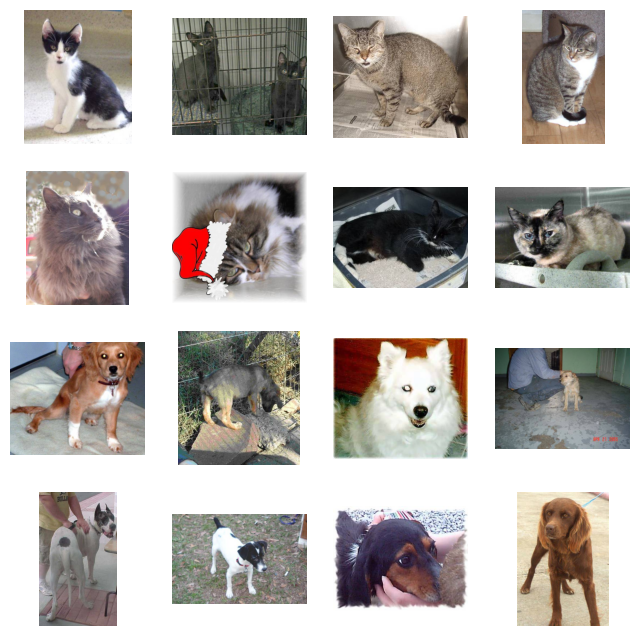

In [6]:
nrows, ncols = 4,4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

random_cat_images = [os.path.join(train_cat_dir, fname) for fname in random.sample(os.listdir(train_cat_dir), k=8)]
random_dog_images = [os.path.join(train_dog_dir, fname) for fname in random.sample(os.listdir(train_dog_dir),k=8)]

for i,img_path in enumerate(random_cat_images + random_dog_images):
  sp = plt.subplot(nrows,ncols,i+1)

  sp.axis('off')
  img =mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
#checking the shape of a cat image
from PIL import Image
cat = Image.open(random_cat_images[5])
print(cat.size)

(499, 486)


## Building a Small Model from Scratch

Now you will define the model architecture. You will add convolutional layers , and flatten the final result to feed into the densely connected layers. Note that because this is a two-class classification problem (i.e. a *binary classification problem*) you will end your network with a [sigmoid activation]. This makes the output value of your network to be a number between 0 and 1. The closer it is to 0, the more likely that the image is a cat. The closer it is to 1, the more likely the image is a dog.

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,411,777 (28.27 MB)

 Trainable params: 7,411,777 (28.27 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing
Next is to prepare the dataset so it can be consumed by the model efficiently while training. To do that, you will use the [`image_from_dataset_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) utility to read pictures in the source folders, convert them to tensors, and combine them with their labels to form a [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). This uses the [tf.data API](https://www.tensorflow.org/guide/data) which is optimized for parallel processing such as feeding data to GPUs and TPUs. It makes the training much faster than when using regular Numpy arrays.

In [13]:
#Instantiate the training dataset
training_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(128,128),
    batch_size=32,
    label_mode='binary',

)

# Instantiate the validation dataset
validation_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128,128),
    batch_size=32,
    label_mode='binary',
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [14]:
#Define the rescaling layer
rescaling_layer = tf.keras.layers.Rescaling(1./255)

#Rescaling both training and validation data
training_scaled_data = training_data.map(lambda img,label : (rescaling_layer(img), label))
validation_scaled_data = validation_data.map(lambda img,label : (rescaling_layer(img),label))

In [15]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

training_batches = training_scaled_data.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
validation_batches = validation_scaled_data.cache().prefetch(buffer_size=PREFETCH_BUFFER_SIZE)

In [16]:
history = model.fit(training_batches,epochs=10,validation_data=validation_batches,verbose=2)

Epoch 1/10
740/740 - 55s - 74ms/step - accuracy: 0.6586 - loss: 0.6145 - val_accuracy: 0.7665 - val_loss: 0.4935
Epoch 2/10
740/740 - 15s - 20ms/step - accuracy: 0.7656 - loss: 0.4880 - val_accuracy: 0.7929 - val_loss: 0.4427
Epoch 3/10
740/740 - 14s - 19ms/step - accuracy: 0.8112 - loss: 0.4104 - val_accuracy: 0.8408 - val_loss: 0.3638
Epoch 4/10
740/740 - 14s - 19ms/step - accuracy: 0.8504 - loss: 0.3406 - val_accuracy: 0.8688 - val_loss: 0.3164
Epoch 5/10
740/740 - 14s - 19ms/step - accuracy: 0.8946 - loss: 0.2543 - val_accuracy: 0.8706 - val_loss: 0.3214
Epoch 6/10
740/740 - 15s - 20ms/step - accuracy: 0.9364 - loss: 0.1617 - val_accuracy: 0.9154 - val_loss: 0.2845
Epoch 7/10
740/740 - 14s - 19ms/step - accuracy: 0.9653 - loss: 0.0892 - val_accuracy: 0.9213 - val_loss: 0.3495
Epoch 8/10
740/740 - 14s - 19ms/step - accuracy: 0.9846 - loss: 0.0460 - val_accuracy: 0.9236 - val_loss: 0.3655
Epoch 9/10
740/740 - 14s - 19ms/step - accuracy: 0.9891 - loss: 0.0321 - val_accuracy: 0.9280 - 

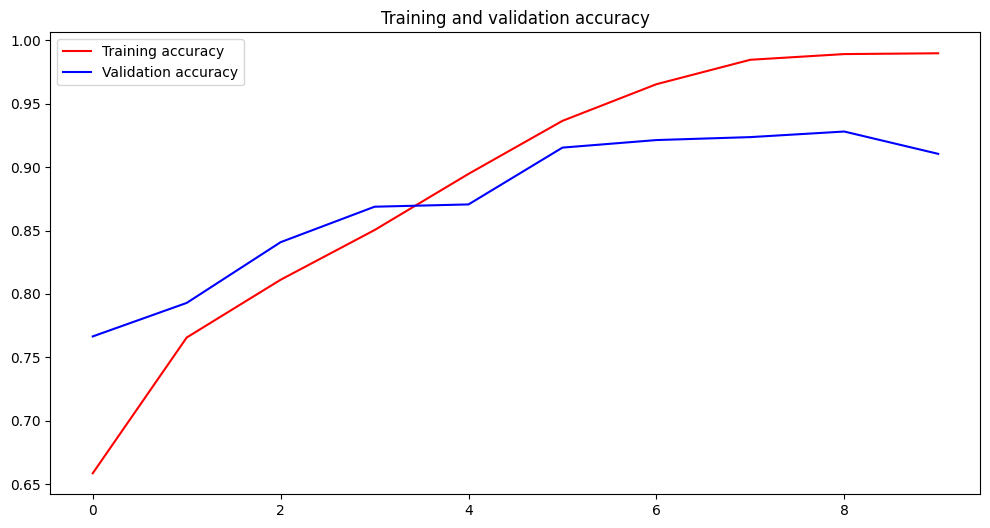

In [23]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,6))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [29]:
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)

out = widgets.Output()
display(out)


def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(128, 128))
    image = tf.keras.utils.img_to_array(image)
    image = rescaling_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")

def on_upload_change(change):
    """ A function for getting files from the widget and running the prediction."""
    uploaded_files = change['new']
    for filename, fileinfo in uploaded_files.items():
        file_content = fileinfo['content']
        file_jpgdata = BytesIO(file_content)
        file_predict(filename, file_jpgdata, out)

uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()